In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'/home/ubundu/Downloads/data.csv')
df.head()


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1

In [3]:
df.shape

(195, 14)

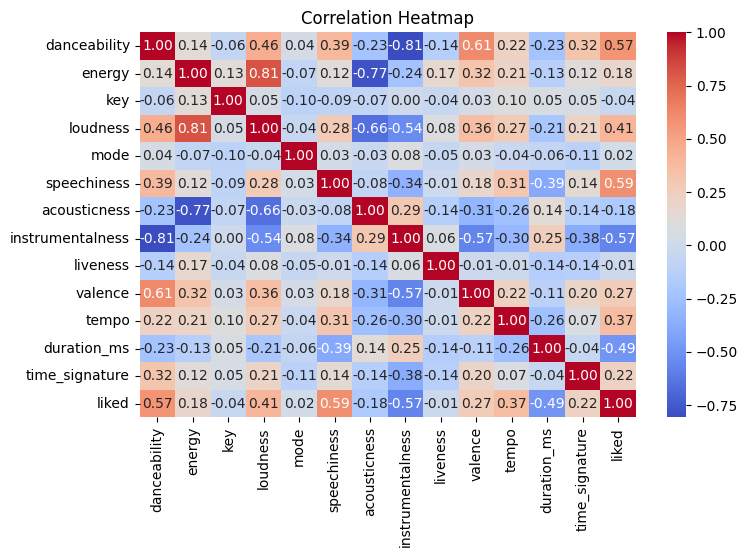

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [5]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [ ]:
df.info()

In [8]:
x=df.drop(['liked'], axis=1)
y=df['liked']


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)

In [10]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [11]:
svm_pred=svm.predict(x_test)
svm_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [12]:
svm.score(x_test,y_test)

0.85

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


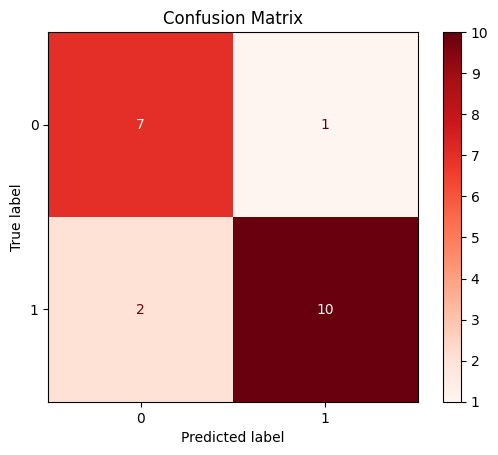

In [14]:
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

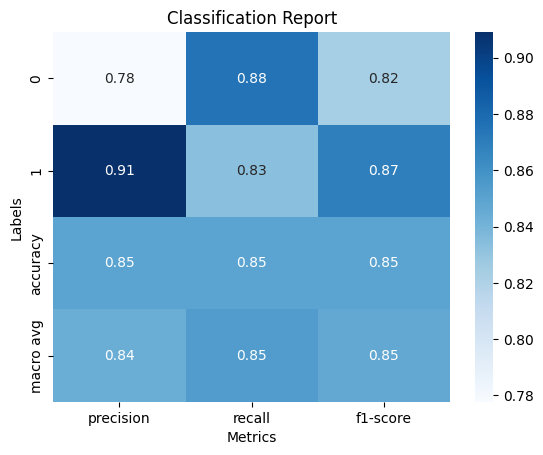

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as dictionary
report = classification_report(y_test, svm_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the basic heatmap
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.show()


In [78]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
kernel1.score(x_test,y_test)

In [ ]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

In [ ]:
kernel2.score(x_test,y_test)

In [ ]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

In [ ]:
kernel3.score(x_test,y_test)

In [16]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

/home/ubundu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
logistic_prediction=logistic.predict(x_test)
logistic_prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [18]:
logistic.score(x_test,y_test)

0.7

Text(0, 0.5, 'Data values')

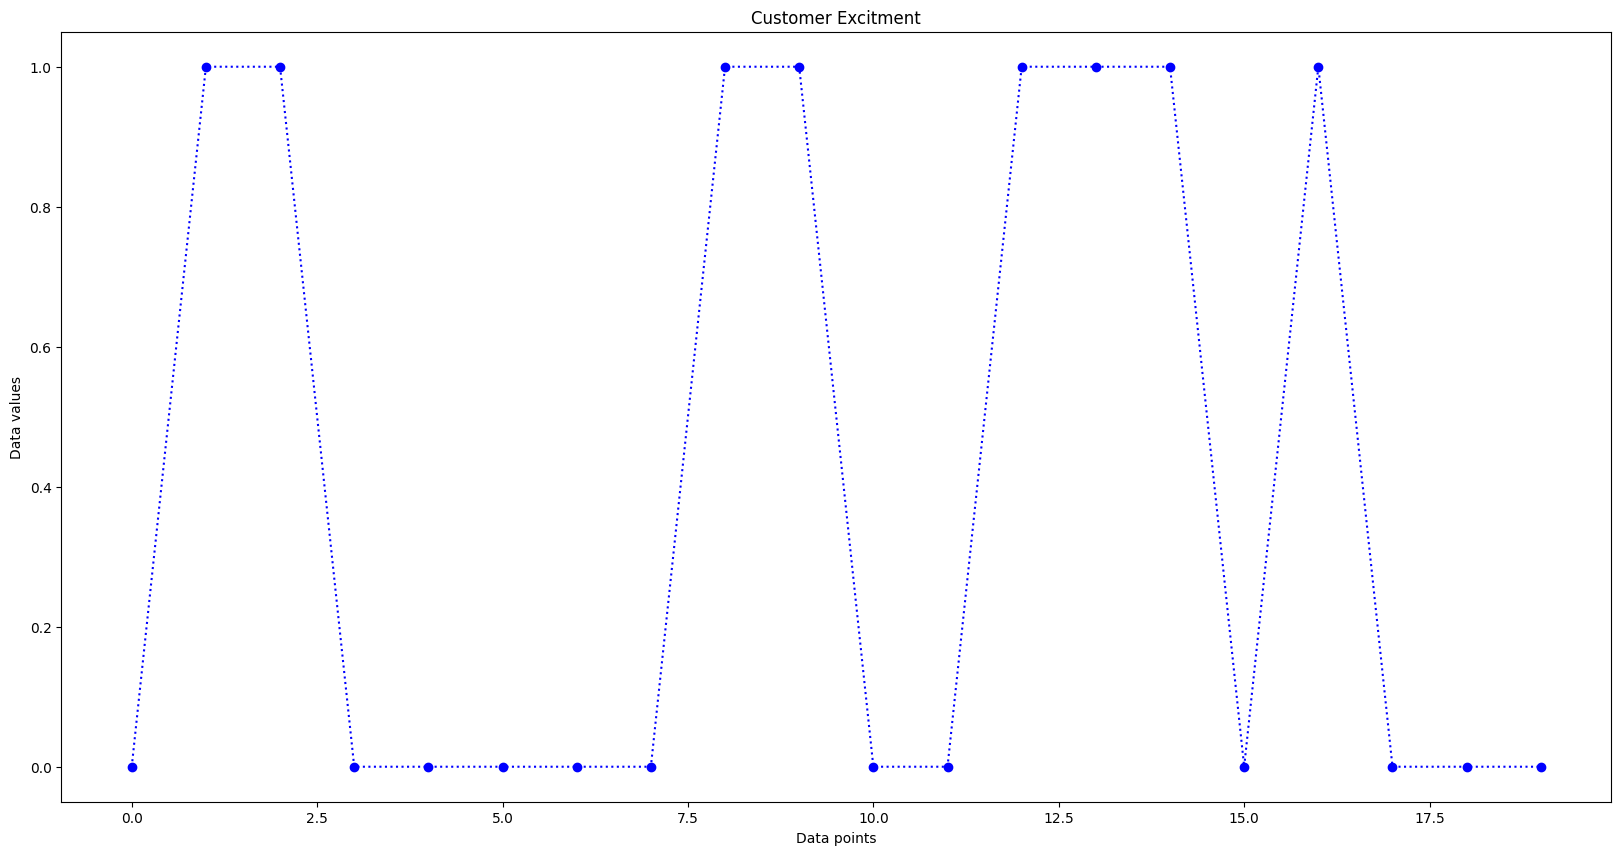

In [19]:
plt.figure(figsize=(20,10))

plt.plot(logistic_prediction,color='blue',linestyle=':',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
knn.score(x_test,y_test)

0.8

In [22]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'accuracy_rate')

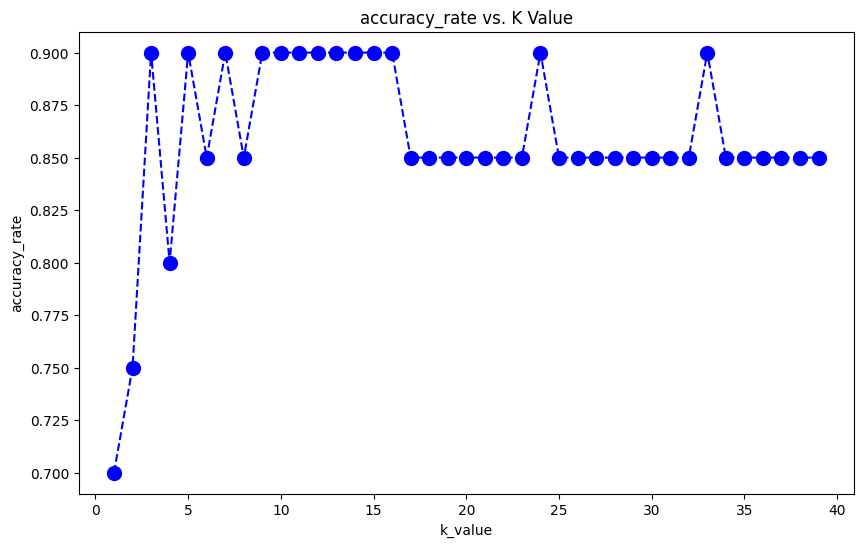

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [24]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

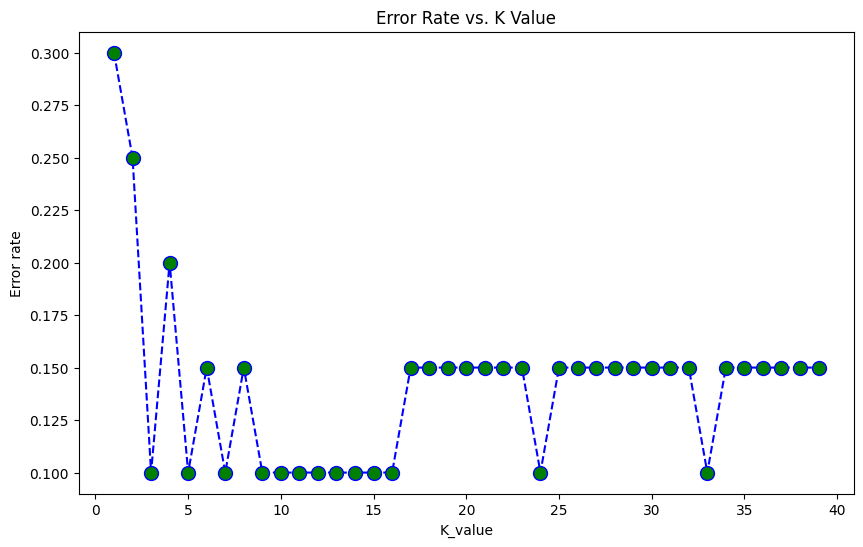

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',
        markerfacecolor='green',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [52]:
knn1=KNeighborsClassifier(n_neighbors=6)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test)

0.85

In [53]:
knn2=KNeighborsClassifier(n_neighbors=7)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

0.9

In [54]:
knn3=KNeighborsClassifier(n_neighbors=16)
knn3.fit(x_train,y_train)
knn3.score(x_test,y_test)

0.9

In [55]:
knn_predict=knn1.predict(x_test)
knn_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

Text(0, 0.5, 'Data values')

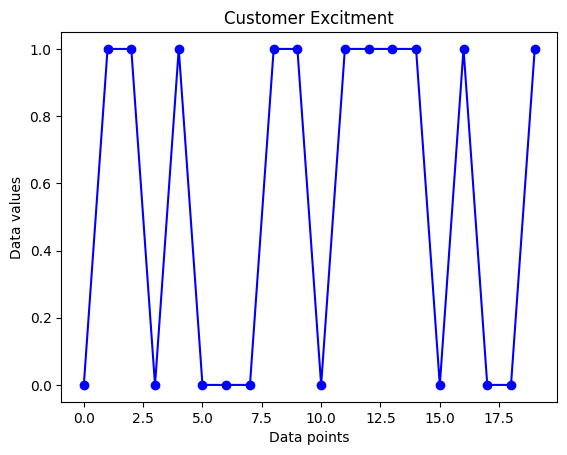

In [30]:
plt.plot(knn_predict,color='blue',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [33]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [34]:
guassian_pred=naive.predict(x_test)
guassian_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

Text(0, 0.5, 'Data values')

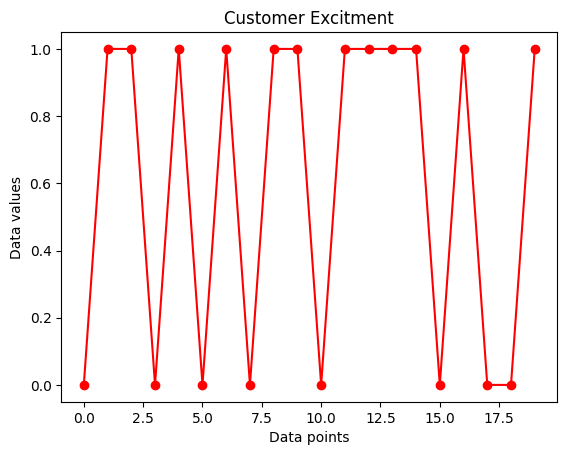

In [35]:
plt.plot(guassian_pred,color='red',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [36]:
naive.score(x_test,y_test)

0.9

In [38]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
random_pred=random.predict(x_test)
random_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [40]:
random.score(x_test,y_test)

0.95

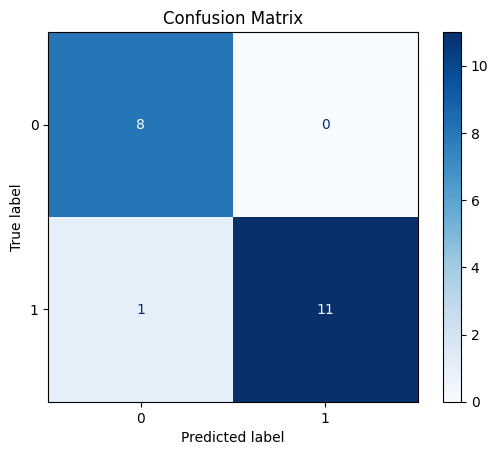

In [41]:
cm = confusion_matrix(y_test, random_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

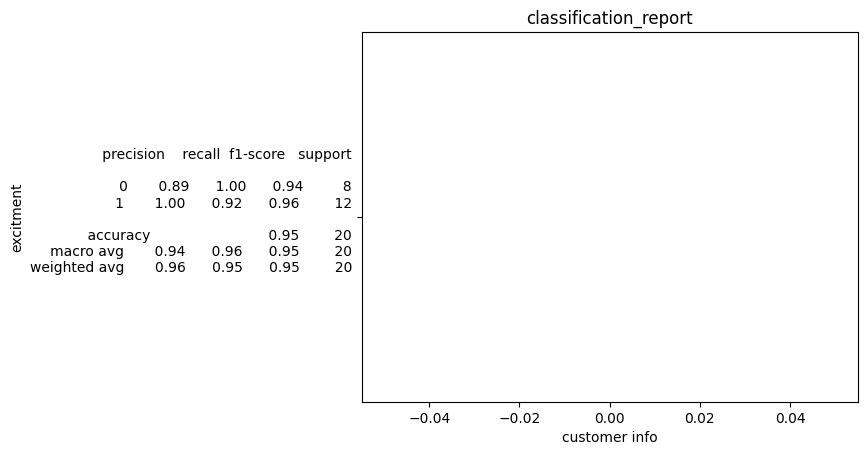

In [42]:
cr= classification_report(y_test, random_pred)
plt.plot(cr)
plt.title("classification_report")
plt.xlabel('customer info')
plt.ylabel('excitment')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
decision_pred=tree.predict(x_test)

In [45]:
tree.score(x_test,y_test)

0.85

In [48]:
import xgboost as xgb


In [49]:

boost = xgb.XGBClassifier()
boost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
boost_pred=boost.predict(x_test)

In [51]:
boost.score(x_test,y_test)

0.9

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [ ]:
gdc

In [ ]:
df.head()

In [ ]:
x

In [ ]:
y

In [ ]:

gdc.fit(x,y)

In [ ]:
gdc.best_params_

In [ ]:


model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores=[]
for model_name in model_params:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'Bernauli':{'model':BernoulliNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}

result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)
        